### Evaluate使用指南

### 查看支持的评估函数

In [4]:
pip install evaluate


Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
  Using cached https://mirrors.aliyun.com/pypi/packages/a2/e7/cbca9e2d2590eb9b5aa8f7ebabe1beb1498f9462d2ecede5c9fd9735faaf/evaluate-0.4.3-py3-none-any.whl (84 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import evaluate

In [4]:
evaluate.list_evaluation_modules()

['NCSOFT/harim_plus',
 'Remeris/rouge_ru',
 'lvwerra/test',
 'angelina-wang/directional_bias_amplification',
 'cpllab/syntaxgym',
 'lvwerra/bary_score',
 'hack/test_metric',
 'yzha/ctc_eval',
 'codeparrot/apps_metric',
 'mfumanelli/geometric_mean',
 'daiyizheng/valid',
 'erntkn/dice_coefficient',
 'mgfrantz/roc_auc_macro',
 'Vlasta/pr_auc',
 'gorkaartola/metric_for_tp_fp_samples',
 'idsedykh/metric',
 'idsedykh/codebleu2',
 'idsedykh/codebleu',
 'idsedykh/megaglue',
 'Vertaix/vendiscore',
 'GMFTBY/dailydialogevaluate',
 'GMFTBY/dailydialog_evaluate',
 'jzm-mailchimp/joshs_second_test_metric',
 'ola13/precision_at_k',
 'yulong-me/yl_metric',
 'abidlabs/mean_iou',
 'abidlabs/mean_iou2',
 'KevinSpaghetti/accuracyk',
 'NimaBoscarino/weat',
 'ronaldahmed/nwentfaithfulness',
 'Viona/infolm',
 'kyokote/my_metric2',
 'kashif/mape',
 'Ochiroo/rouge_mn',
 'giulio98/code_eval_outputs',
 'leslyarun/fbeta_score',
 'giulio98/codebleu',
 'anz2/iliauniiccocrevaluation',
 'zbeloki/m2',
 'xu1998hz/sesco

### 加载评估函数

In [5]:
accuracy=evaluate.load("accuracy")

In [6]:
print(accuracy.description)


Accuracy is the proportion of correct predictions among the total number of cases processed. It can be computed with:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
 Where:
TP: True positive
TN: True negative
FP: False positive
FN: False negative



In [7]:
accuracy

EvaluationModule(name: "accuracy", module_type: "metric", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(results)
    

### 评估指标计算--全局计算

In [8]:
accuracy=evaluate.load("accuracy")
results=accuracy.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
results

{'accuracy': 0.5}

### 评估指标计算--迭代计算

In [10]:
accuracy=evaluate.load("accuracy")
for ref,pred in zip([0,1,0,1],[1,0,0,1]):
    accuracy.add(references=ref,predictions=pred)
accuracy.compute()

{'accuracy': 0.5}

In [11]:
accuracy=evaluate.load("accuracy")
for ref,pred in zip([[0,1],[0,1]],[[1,0],[0,1]]):
    accuracy.add_batch(references=ref,predictions=pred)
accuracy.compute()

{'accuracy': 0.5}

### 多个评估指标计算

In [12]:
clf_metrics=evaluate.combine(["accuracy", "f1", "precision", "recall"])
clf_metrics

In [13]:
clf_metrics.compute(predictions=[0,1,0], references=[0,1,1])

{'accuracy': 0.6666666666666666,
 'f1': 0.6666666666666666,
 'precision': 1.0,
 'recall': 0.5}

### 评估对比可视化

In [14]:
from evaluate.visualization import radar_plot


In [15]:
data=[
    {'accuracy':0.99,'precision':0.8,'f1':0.95,'latency_in_seconds':33.6},
    {'accuracy':0.98,'precision':0.87,'f1':0.91,'latency_in_seconds':11.2},
    {'accuracy':0.98,'precision':0.78,'f1':0.88,'latency_in_seconds':87.6},
    {'accuracy':0.88,'precision':0.78,'f1':0.81,'latency_in_seconds':101.6},
]
model_names=['model1','model2','model3','model4']

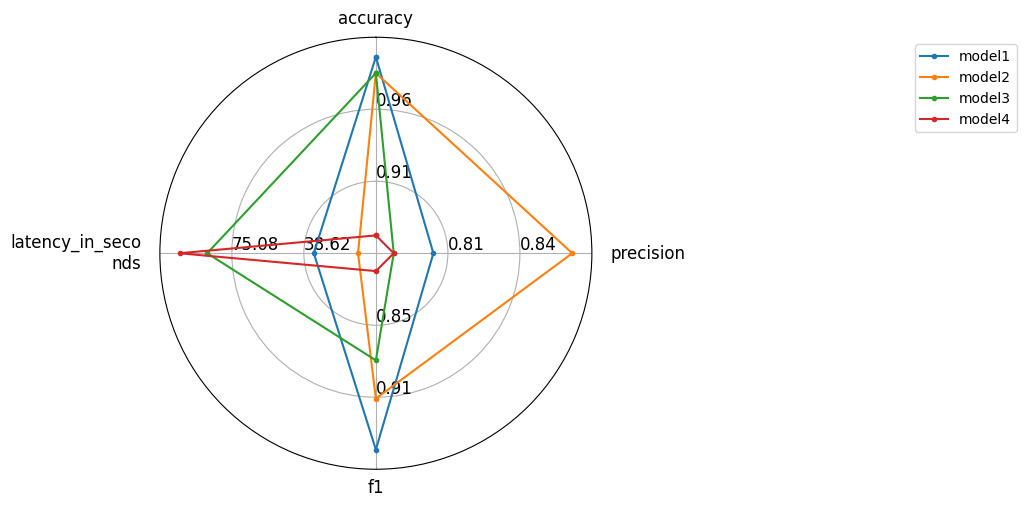

In [16]:
plot=radar_plot(data=data,model_names=model_names)

-----------------------------------------------------------

1.导包

In [1]:
pip install transformers

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
Note: you may need to restart the kernel to use updated packages.


In [1]:
from transformers import Trainer, TrainingArguments,AutoTokenizer, AutoModelForSequenceClassification
from datasets import load_dataset

2.加载数据集

In [4]:
dataset=load_dataset('dirtycomputer/ChnSentiCorp_htl_all',split='train')
dataset=dataset.filter(lambda x:x['review'] is not None)#过滤掉review为空的样本
dataset

ChnSentiCorp_htl_all.csv: 0.00B [00:00, ?B/s]

D:\Environment\Python\python3.10\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in D:\LLM\Huggingface\datasets--dirtycomputer--ChnSentiCorp_htl_all. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Generating train split: 0 examples [00:00, ? examples/s]

Filter:   0%|          | 0/7766 [00:00<?, ? examples/s]

Dataset({
    features: ['label', 'review'],
    num_rows: 7765
})

3.划分数据集

In [5]:
dataset=dataset.train_test_split(test_size=0.1)
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'review'],
        num_rows: 6988
    })
    test: Dataset({
        features: ['label', 'review'],
        num_rows: 777
    })
})

### 4.数据预处理

In [ ]:
import torch
tokenizer=AutoTokenizer.from_pretrained('hfl/rbt3')
def process_function(examples):
    tokenized_examples=tokenizer(examples['review'],max_length=128,truncation=True)
    tokenized_examples['label']=examples['label']
    return tokenized_examples
tokenized_dataset=dataset.map(process_function,batched=True,remove_columns=dataset['train'].column_names)
tokenized_dataset

Map:   0%|          | 0/6988 [00:00<?, ? examples/s]

Map:   0%|          | 0/777 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 6988
    })
    test: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 777
    })
})

In [8]:
# from torch.utils.data import Dataset, DataLoader
# from transformers import DataCollatorWithPadding
# trainset,validset=tokenized_dataset['train'],tokenized_dataset['test']
# trainloader=DataLoader(trainset,batch_size=32,shuffle=True,collate_fn=DataCollatorWithPadding(tokenizer))
# validloader=DataLoader(validset,batch_size=64,shuffle=False,collate_fn=DataCollatorWithPadding(tokenizer))

### 5.创建模型及优化器

In [10]:
from torch.optim import Adam
model=AutoModelForSequenceClassification.from_pretrained('hfl/rbt3')
# if torch.cuda.is_available():
#     model=model.cuda()
# trainer会自动判定是否使用cuda

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at hfl/rbt3 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# optimizer=Adam(model.parameters(),lr=2e-5)

### 6.训练与验证

In [17]:
import evaluate
# clf_metrics=evaluate.combine(['accuracy', 'f1'])
acc_metrics=evaluate.load('accuracy')
f1_metrics=evaluate.load('f1')

In [18]:
# 2------------------
def evla_metrics(eval_predict):
    predictions,labels=eval_predict
    predictions=predictions.argmax(-1)
    acc=acc_metrics.compute(predictions=predictions,references=labels)
    f1=f1_metrics.compute(predictions=predictions,references=labels)
    acc.update(f1)
    return acc

### 7.创建TrainingArguments,2------------------------------

In [15]:
# 2***********************
train_args=TrainingArguments(output_dir='./checkpoints')
train_args

TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=False,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_steps=None,
eval_strategy=no,
evaluation_strategy=None,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_c

In [25]:
# 2--------------------------创建trainer
from transformers import DataCollatorWithPadding
trainer=Trainer(model=model,
                args=train_args,
                train_dataset=tokenized_dataset['train'],
                eval_dataset=tokenized_dataset['test'],
                data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
                compute_metrics=evla_metrics
                )

### 8. 模型训练2------------------

In [26]:
# 2-------------------
trainer.train()

FailedPreconditionError: ./checkpoints is not a directory

### 9.模型评估

In [24]:
trainer.evaluate(tokenized_dataset['test'])

FailedPreconditionError: ./checkpoints is not a directory

### 10.模型预测

In [ ]:
trainer.predict(tokenized_dataset['test'])

In [14]:
#原来的


SyntaxError: unexpected character after line continuation character (1406375738.py, line 2)